# Quickstart

In [1]:
import sensemapi
import os

## Creating an account object

If you want to access the [OpenSenseMap API](https://api.opensensemap.org) via the `sensemapi` package, you first create a account object:

In [2]:
account = sensemapi.account.SenseMapAccount(
    username=os.environ.get("SENSEMAP_USER"),
    email=os.environ.get("SENSEMAP_EMAIL"),
    password=os.environ.get("SENSEMAP_PASSWORD"),
)

You can **either** specify `username` or `email`. Here the credentials are taken from the environment variables `SENSEMAP_EMAIL`, `SENSEMAP_USER` and `SENSEMAP_PASSWORD`. You may of course also specify them directly. This is just a handy way of preventing exposure of sensible login data in the source code. If you don't specify the credentials, the account will just work all public actions that don't require being signed in. 

## Getting the account's senseBoxes 

To obtain the account's boxes, run

In [3]:
account.get_own_boxes()

sensemapi.senseBox.senseBoxCollection(
    boxes = [sensemapi.senseBox.senseBox(
        id = '5bae322a043f3f001bf7204c',
        exposure = 'outdoor',
        grouptag = None,
        description = None,
        name = 'My first senseBox',
        sensors = sensemapi.sensor.senseBoxSensorCollection(
            sensors = [sensemapi.sensor.senseBoxSensor(
                id = '5bae322a043f3f001bf7204d',
                type = 'SHT31',
                title = 'temperature',
                unit = '°C',
                icon = 'osem-temperature-celsius',
                last_value = None,
                last_time = None
                )]
            ),
        image = None,
        current_lat = 53.57498,
        current_lon = 9.98635,
        current_height = None,
        weblink = None
        )]
    )

Having obtained the boxes, you may access them later like via the `boxes` property:

In [4]:
account.boxes

sensemapi.senseBox.senseBoxCollection(
    boxes = [sensemapi.senseBox.senseBox(
        id = '5bae322a043f3f001bf7204c',
        exposure = 'outdoor',
        grouptag = None,
        description = None,
        name = 'My first senseBox',
        sensors = sensemapi.sensor.senseBoxSensorCollection(
            sensors = [sensemapi.sensor.senseBoxSensor(
                id = '5bae322a043f3f001bf7204d',
                type = 'SHT31',
                title = 'temperature',
                unit = '°C',
                icon = 'osem-temperature-celsius',
                last_value = None,
                last_time = None
                )]
            ),
        image = None,
        current_lat = 53.57498,
        current_lon = 9.98635,
        current_height = None,
        weblink = None
        )]
    )

This account seemingly has no boxes defined yet.

## Creating new senseBoxes

Let's create a new `senseBox`:

In [5]:
box = sensemapi.senseBox.senseBox(
    # This is the minimum set of necessary metadata
    name="My first senseBox",
    exposure="outdoor",
    current_lat=53.57498,
    current_lon=9.98635,
)
box

sensemapi.senseBox.senseBox(
    id = None,
    exposure = 'outdoor',
    grouptag = None,
    description = None,
    name = 'My first senseBox',
    sensors = sensemapi.sensor.senseBoxSensorCollection(
        sensors = []
        ),
    image = None,
    current_lat = 53.57498,
    current_lon = 9.98635,
    current_height = None,
    weblink = None
    )

### Copying an Existing senseBox

If you want to start from an existing senseBox, you can do:

```python
box = account.boxes[0]  # or account.boxes.by_name()["name of your senseBox"]
box.name = "new name for senseBox"
# ... might also change other metadata of the senseBox ...
box.upload_as_new()
# the variable 'box' now contains the UPDATED box and can be handled as such
```

## Adding sensors to a senseBox

A senseBox always needs **at least one sensor**. Adding a sensor to a senseBox works like this:

In [6]:
box.new_sensor(
    title="temperature",
    unit="°C",
    type="SHT31",
    icon="osem-temperature-celsius",
)

sensemapi.sensor.senseBoxSensor(
    id = None,
    type = 'SHT31',
    title = 'temperature',
    unit = '°C',
    icon = 'osem-temperature-celsius',
    last_value = None,
    last_time = None
    )

The box now looks like this:

In [7]:
box

sensemapi.senseBox.senseBox(
    id = None,
    exposure = 'outdoor',
    grouptag = None,
    description = None,
    name = 'My first senseBox',
    sensors = sensemapi.sensor.senseBoxSensorCollection(
        sensors = [sensemapi.sensor.senseBoxSensor(
            id = None,
            type = 'SHT31',
            title = 'temperature',
            unit = '°C',
            icon = 'osem-temperature-celsius',
            last_value = None,
            last_time = None
            )]
        ),
    image = None,
    current_lat = 53.57498,
    current_lon = 9.98635,
    current_height = None,
    weblink = None
    )

## Uploading the senseBox

To upload the new senseBox, run

In [8]:
account.new_box(box)

sensemapi.senseBox.senseBox(
    id = '5bae326b043f3f001bf72b96',
    exposure = 'outdoor',
    grouptag = None,
    description = None,
    name = 'My first senseBox',
    sensors = sensemapi.sensor.senseBoxSensorCollection(
        sensors = [sensemapi.sensor.senseBoxSensor(
            id = '5bae326b043f3f001bf72b97',
            type = 'SHT31',
            title = 'temperature',
            unit = '°C',
            icon = 'osem-temperature-celsius',
            last_value = None,
            last_time = None
            )]
        ),
    image = None,
    current_lat = 53.57498,
    current_lon = 9.98635,
    current_height = None,
    weblink = None
    )

## Uploading measurements

Now that the senseBox is online, we can upload data to one of its sensors (we currently only have one):

In [9]:
# Extract the first (any only) sensor of our first (any only) senseBox
sensor = account.boxes[0].sensors[0]
# setting the last_time to None let's the API use the current time
sensor.last_time = None
# set the sensor value
# In a real-world application this might of course be a sophisticated
# mechanism.
sensor.last_value = 25.2
# Upload the measurement
sensor.upload_measurement()
print(
    "Check the uploaded measurement at https://opensensemap.org/explore/{}".format(
        sensor.box.id
    )
)

Check the uploaded measurement at https://opensensemap.org/explore/5bae322a043f3f001bf7204c


(The link will not work for you as your senseBox ID will be different)

## Modifying the senseBox

In [10]:
box = account.boxes[0]
# change the senseBox name
box.name = "My supercool senseBox"
# add another sensor
box.new_sensor(title="humidity", unit="%", type="SHT31", icon="osem-humidity")
# upload the changes
box.upload_metadata()
box

sensemapi.senseBox.senseBox(
    id = '5bae322a043f3f001bf7204c',
    exposure = 'outdoor',
    grouptag = None,
    description = None,
    name = 'My supercool senseBox',
    sensors = sensemapi.sensor.senseBoxSensorCollection(
        sensors = [sensemapi.sensor.senseBoxSensor(
            id = '5bae322a043f3f001bf7204d',
            type = 'SHT31',
            title = 'temperature',
            unit = '°C',
            icon = 'osem-temperature-celsius',
            last_value = None,
            last_time = None
            ), sensemapi.sensor.senseBoxSensor(
            id = '5bae326b043f3f001bf72ba9',
            type = 'SHT31',
            title = 'humidity',
            unit = '%',
            icon = 'osem-humidity',
            last_value = None,
            last_time = None
            )]
        ),
    image = None,
    current_lat = 53.57498,
    current_lon = 9.98635,
    current_height = None,
    weblink = None
    )

You should now see that there are two sensors in your [OpenSenseMap Dashboard](https://opensensemap.org/account).

## Deleting a sensor from a senseBox

If you would rather remove one of the sensors of a senseBox (including all its measurements), do it like this:

In [11]:
# get the sensor 'temperature' from the first (and only) box
sensor = account.boxes[0].sensors.temperature
# delete the sensor
sensor.delete(really=True)
# the sensor has been deleted
assert "temperature" not in account.boxes[0].sensors.by_title
box

sensemapi.senseBox.senseBox(
    id = '5bae322a043f3f001bf7204c',
    exposure = 'outdoor',
    grouptag = None,
    description = None,
    name = 'My supercool senseBox',
    sensors = sensemapi.sensor.senseBoxSensorCollection(
        sensors = [sensemapi.sensor.senseBoxSensor(
            id = '5bae326b043f3f001bf72ba9',
            type = 'SHT31',
            title = 'humidity',
            unit = '%',
            icon = 'osem-humidity',
            last_value = None,
            last_time = None
            )]
        ),
    image = None,
    current_lat = 53.57498,
    current_lon = 9.98635,
    current_height = None,
    weblink = None
    )

## Deleting all senseBoxes

To delete all senseBoxes in an account (including all measurements) run:

In [12]:
account.get_details()
for box in account.boxes:
    account.delete_box(box.id, really=True)

## Retreiving a senseBox by its id

You can retreive any senseBox by its id. You don't need account credentials for this.

In [13]:
# from an account (even without credentials)
box = account.get_box(id="57000b8745fd40c8196ad04c")
# without credentials
box = sensemapi.client.SenseMapClient().get_box(id="57000b8745fd40c8196ad04c")

## Retrieving sensor measurements

In [14]:
# the box' first sensor
measurements = box.sensors[0].get_measurements()

### Use Matplotlib for Plotting

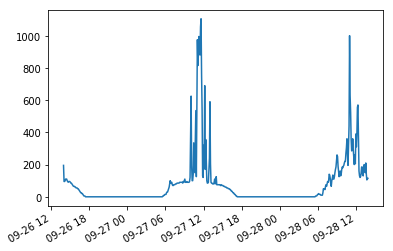

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(
    measurements.data["createdAt"],  # list of datetime.datetime
    measurements.data["value"],  # list of values
)
plt.gcf().autofmt_xdate()
plt.show()

### Pandas Series

> ### Note
> 
> To enable this feature you need to install `sensemapi` like this:
> 
> ```bash
> python3 -m pip install --user 'sensemapi[mqtt]'
> ```

2018-09-28 13:51:00.633000+00:00    115.0
2018-09-28 13:41:05.500000+00:00    105.0
2018-09-28 13:36:08.846000+00:00    140.0
2018-09-28 13:31:13.096000+00:00    210.0
2018-09-28 13:26:17.108000+00:00    150.0
Name: UV-Intensität (VEML6070) [μW/cm²], dtype: float64


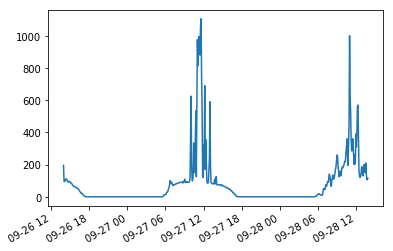

In [16]:
# convert measurements to a pandas.Series
# This obviously only works if pandas is installed.
data = measurements.series
# First rows of data
print(data.head())
# Pandas quick plotting
data.plot()